In [1]:
import opendatasets as od
#od.download('https://www.kaggle.com/datasets/prathamtripathi/drug-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  chandrashekharbasu


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification


100%|██████████| 1.68k/1.68k [00:00<00:00, 789kB/s]

In [77]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_df = pd.read_csv('drug-classification/drug200.csv')

In [78]:
data_df
device = 'cpu'

In [79]:
data_df.dropna(inplace = True)

In [80]:
data_df = pd.get_dummies(data_df)
data_df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,True,False,True,False,False,True,False,True,False,False,False,False
1,47,13.093,False,True,False,True,False,True,False,False,False,False,True,False
2,47,10.114,False,True,False,True,False,True,False,False,False,False,True,False
3,28,7.798,True,False,False,False,True,True,False,False,False,False,False,True
4,61,18.043,True,False,False,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False,False,False,False,True,False
196,16,12.006,False,True,False,True,False,True,False,False,False,False,True,False
197,52,9.894,False,True,False,False,True,True,False,False,False,False,False,True
198,23,14.020,False,True,False,False,True,False,True,False,False,False,False,True


In [81]:
x_df = data_df.iloc[:,:-5]
x_df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,True,False,True,False,False,True,False
1,47,13.093,False,True,False,True,False,True,False
2,47,10.114,False,True,False,True,False,True,False
3,28,7.798,True,False,False,False,True,True,False
4,61,18.043,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False
196,16,12.006,False,True,False,True,False,True,False
197,52,9.894,False,True,False,False,True,True,False
198,23,14.020,False,True,False,False,True,False,True


In [82]:
y_df = data_df.iloc[:,-5:]
y_df

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,True
4,True,False,False,False,False
...,...,...,...,...,...
195,False,False,False,True,False
196,False,False,False,True,False
197,False,False,False,False,True
198,False,False,False,False,True


In [83]:
original_x_df = x_df.copy()
#normalized
for column in x_df.columns:
    if(x_df[column].dtype!=bool):
        x_df[column] = x_df[column]/x_df[column].abs().max()


x_df = x_df.astype(float)
x_df

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,0.310811,0.662928,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.635135,0.342328,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.635135,0.264439,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.378378,0.203885,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.824324,0.471749,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.756757,0.302429,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,0.216216,0.313907,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.702703,0.258687,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,0.310811,0.366565,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [84]:
X = np.array(x_df)
Y = np.array(y_df)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.3)


In [87]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

training_data = dataset(X_Train, Y_Train)
test_data = dataset(X_Test, Y_Test)

training_data.Y.shape

torch.Size([140, 5])

In [88]:
BATCH_SIZE = 8
training_dataloader = DataLoader(training_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = True)

In [100]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()

        self.input_layer = nn.Linear(X.shape[1],30)
        self.sigmoid_1 = nn.Sigmoid()
        self.output_layer = nn.Linear(30,Y.shape[1])
        self.sigmoid_2 = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.sigmoid_1(x)
        x = self.output_layer(x)
        x = self.sigmoid_2(x)
        return x

model = MyModel()
model

MyModel(
  (input_layer): Linear(in_features=9, out_features=30, bias=True)
  (sigmoid_1): Sigmoid()
  (output_layer): Linear(in_features=30, out_features=5, bias=True)
  (sigmoid_2): Sigmoid()
)

In [101]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(),lr = 1e-3)


LOSS FOR EPOCH 0 IS 11.221437215805054
LOSS FOR EPOCH 1 IS 10.190099656581879
LOSS FOR EPOCH 2 IS 9.487026304006577
LOSS FOR EPOCH 3 IS 8.948870241641998
LOSS FOR EPOCH 4 IS 8.67244952917099
LOSS FOR EPOCH 5 IS 8.419232100248337
LOSS FOR EPOCH 6 IS 8.299542397260666
LOSS FOR EPOCH 7 IS 8.180740028619766
LOSS FOR EPOCH 8 IS 8.111055046319962
LOSS FOR EPOCH 9 IS 8.063809126615524
LOSS FOR EPOCH 10 IS 8.031112968921661
LOSS FOR EPOCH 11 IS 8.01193180680275
LOSS FOR EPOCH 12 IS 8.035351008176804
LOSS FOR EPOCH 13 IS 7.986104369163513
LOSS FOR EPOCH 14 IS 7.94850093126297
LOSS FOR EPOCH 15 IS 7.930297613143921
LOSS FOR EPOCH 16 IS 7.982854455709457
LOSS FOR EPOCH 17 IS 7.951244652271271
LOSS FOR EPOCH 18 IS 7.920560210943222
LOSS FOR EPOCH 19 IS 7.881384521722794
LOSS FOR EPOCH 20 IS 7.886759102344513
LOSS FOR EPOCH 21 IS 7.866672188043594
LOSS FOR EPOCH 22 IS 7.845975399017334
LOSS FOR EPOCH 23 IS 7.880333125591278
LOSS FOR EPOCH 24 IS 7.784652084112167
LOSS FOR EPOCH 25 IS 7.7925573885440

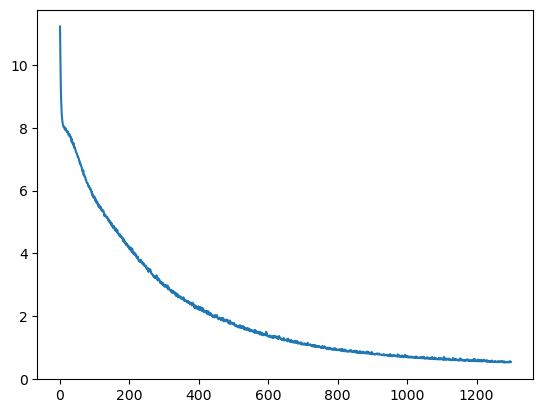

In [102]:
loss_plot = []
EPOCHS = 1300

for epoch in range(EPOCHS):
    loss_cum = 0
    for data in training_dataloader:
        inputs, outputs = data
        predictions = model(inputs)
        loss_object = criterion(predictions,outputs)
        loss_cum += loss_object.item()
        loss_object.backward()
        optimizer.step()
        optimizer.zero_grad()
    loss_plot.append(loss_cum)
    print("LOSS FOR EPOCH " + str(epoch)+ " IS "+ str(loss_cum))
    print('=============================================')

plt.plot(loss_plot)
plt.show()